# Frauds Detection

## Exploratory Data Analysis (EDA)

In order to understand the abnormal behaviors in the data, it is common to begin with descriptive statistics analysis before using features selction methods and building the model

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
plt.rcParams.update({'font.size': 20, 'figure.figsize':(15, 8)})

In [301]:
# import dataset
df = pd.read_csv('fact_impression_data.tsv', sep='\t')
df = pd.DataFrame(df)

In [311]:
df.head()

,dayid,hourid,domainHash,userID,Numofimpressions,NumofVideoImpressions,NumOfViewableImpressions,hasClick,isFraudBot,operatingSystem,browserID
0,20180807,1,45930940989556999,1742250804692308090,1,0,1,0,0,6,5
1,20180807,1,8767039336072643750,3070608196979695851,1,1,1,0,1,2,1
2,20180807,2,-7599864533083732853,6287584166975788826,1,0,0,0,0,7,5
3,20180807,2,-4999260756451622130,7565739170240475265,1,0,0,0,0,7,3
4,20180807,2,-3287996646146655466,5266052517991587709,5,0,2,0,0,6,5


In [312]:
data=df.copy()

In [313]:
data['isFraudBot']=data['isFraudBot'].replace(1, 'Fraud')

In [314]:
data['isFraudBot']=data['isFraudBot'].replace(0, 'Not Fraud')

In [315]:
d = pd.DataFrame(data['isFraudBot'].value_counts())
d['percent'] = (d['isFraudBot']/d['isFraudBot'].sum())*100
d

,isFraudBot,percent
Not Fraud,38489,89.509302
Fraud,4511,10.490698


It is typical imbalanced data of classification problem where the classes are not represented equally.
We will deal with it in the pre-processing level.
Some algorithms like Light GBM, xGboost and Catboost know how to treat it in their mechanism.

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


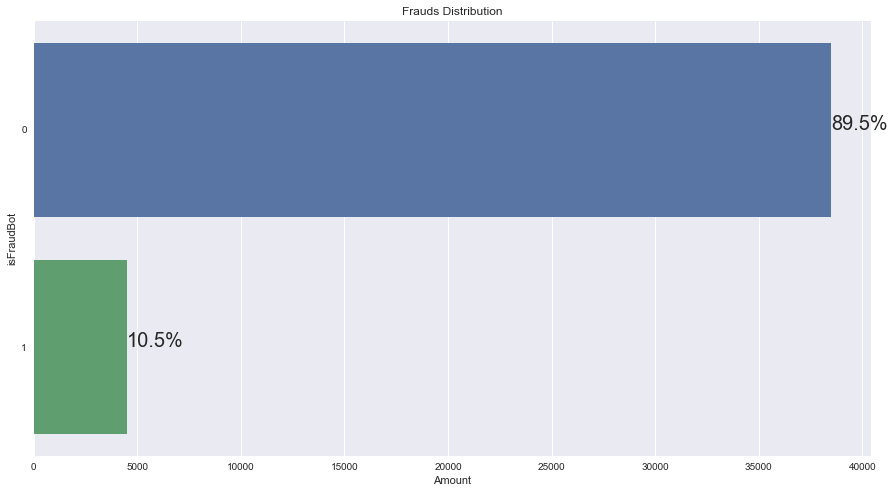

In [422]:
ax = sns.countplot(y="isFraudBot", data=df)
plt.title('Frauds Distribution')
plt.xlabel('Amount')

total = len(df['isFraudBot'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [228]:
frauds=df[df['isFraudBot']=='Fraud']

In [229]:
# Number of features and amount of samples
df.shape

(43000, 11)

In [230]:
# Check features datatypes
types = df.dtypes
pd.DataFrame(types)

,0
dayid,int64
hourid,int64
domainHash,int64
userID,int64
Numofimpressions,int64
NumofVideoImpressions,int64
NumOfViewableImpressions,int64
hasClick,int64
isFraudBot,object
operatingSystem,int64


In [437]:
for col in ['hasClick','isFraudBot']:
    df[col] = df[col].astype('int64')

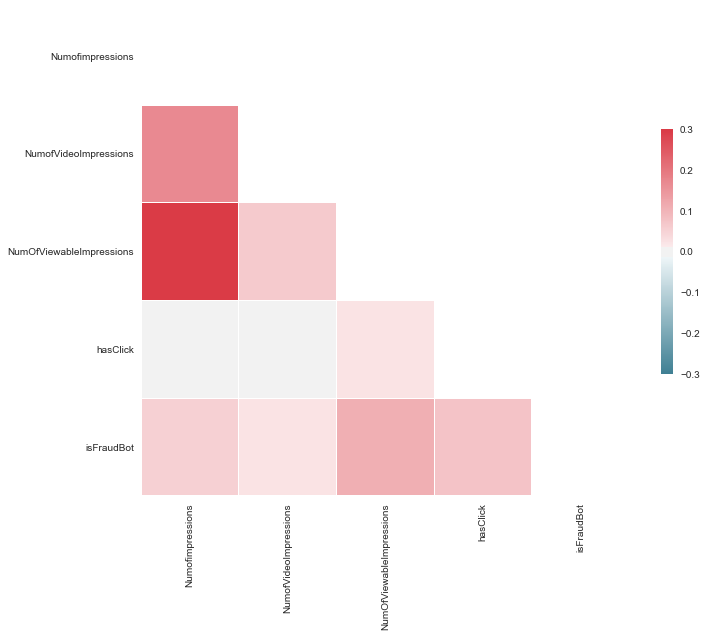

In [438]:
# Compute the correlation matrix
sns.set(style="white")

corr = df.drop(['hourid', 'domainHash', 'userID' ,'operatingSystem','browserID'], axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Text(0, 0.5, 'Frequency')

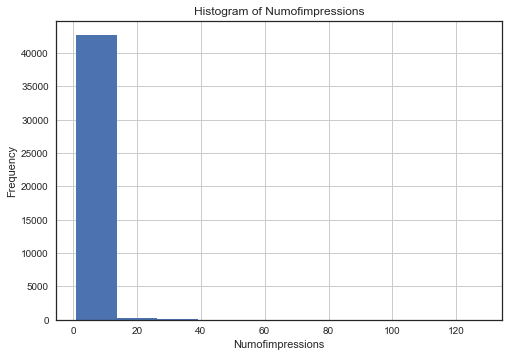

In [465]:
df.Numofimpressions.hist()
plt.title('Histogram of Numofimpressions')
plt.xlabel('Numofimpressions')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

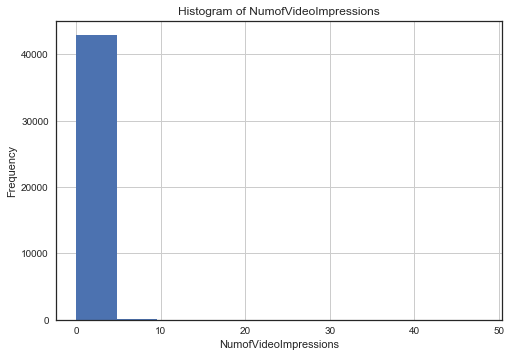

In [467]:
df.NumofVideoImpressions.hist()
plt.title('Histogram of NumofVideoImpressions')
plt.xlabel('NumofVideoImpressions')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

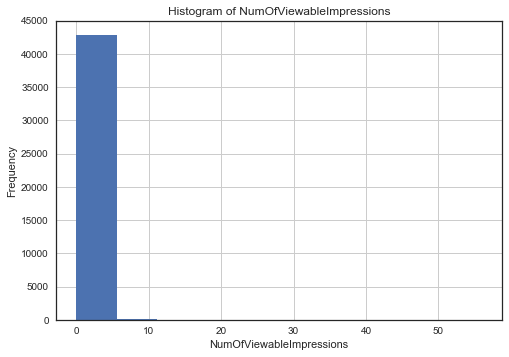

In [468]:
df.NumOfViewableImpressions.hist()
plt.title('Histogram of NumOfViewableImpressions')
plt.xlabel('NumOfViewableImpressions')
plt.ylabel('Frequency')

In [360]:
categories = ['dayid', 'hourid', 'domainHash', 'userID', 'hasClick','isFraudBot','operatingSystem','browserID']
# Change to categorial data type
for col in categories:
    df[col] = df[col].astype('category')

In [236]:
# Number of Unique values
df[categories].nunique()

dayid                 1
hourid               24
domainHash          176
userID             9100
hasClick              2
isFraudBot            2
operatingSystem       4
browserID             4
dtype: int64

We can see above that "dayid" feature has just one element so we will remove it in the dimension reduction level.

In [237]:
frauds[categories].nunique()

dayid                1
hourid              24
domainHash         160
userID             452
hasClick             2
isFraudBot           1
operatingSystem      3
browserID            2
dtype: int64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 11 columns):
dayid                       43000 non-null category
hourid                      43000 non-null category
domainHash                  43000 non-null category
userID                      43000 non-null category
Numofimpressions            43000 non-null int64
NumofVideoImpressions       43000 non-null int64
NumOfViewableImpressions    43000 non-null int64
hasClick                    43000 non-null category
isFraudBot                  43000 non-null category
operatingSystem             43000 non-null category
browserID                   43000 non-null category
dtypes: category(8), int64(3)
memory usage: 1.8 MB


In [239]:
df.isnull().any()

dayid                       False
hourid                      False
domainHash                  False
userID                      False
Numofimpressions            False
NumofVideoImpressions       False
NumOfViewableImpressions    False
hasClick                    False
isFraudBot                  False
operatingSystem             False
browserID                   False
dtype: bool

There are no missing values, but in case of missing values we need to mpute or remove them.
First is better to understand the reason for these missingness and then to decide how to deal with it.

In [354]:
# Get numeric data
all_columns = df.columns
num_columns = df._get_numeric_data().columns

In [355]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

# Descriptive statistics
describe(df[num_columns])

,Numofimpressions,NumofVideoImpressions,NumOfViewableImpressions
count,43000.000000,43000.000000,43000.000000
mean,1.918070,0.092140,0.721116
std,2.751270,0.702014,1.020655
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000
max,128.000000,48.000000,56.000000
mad,1.213774,0.174135,0.597688
skew,13.793031,30.499823,12.908789


In [367]:
# Descriptive statistics
df.groupby(['hourid', 'isFraudBot'])['Numofimpressions'].describe()

count      mean        std  min  25%  50%  75%    max
hourid isFraudBot                                                        
0      0           1079.0  1.855422   4.323582  1.0  1.0  1.0  2.0  128.0
       1            242.0  1.280992   1.237204  1.0  1.0  1.0  1.0   17.0
1      0            805.0  1.773913   2.420079  1.0  1.0  1.0  2.0   42.0
       1            138.0  1.297101   0.729057  1.0  1.0  1.0  1.0    5.0
2      0            617.0  2.092382   2.753903  1.0  1.0  1.0  2.0   29.0
       1            127.0  1.448819   1.445895  1.0  1.0  1.0  1.0   12.0
3      0            441.0  1.943311   2.542182  1.0  1.0  1.0  2.0   32.0
       1            136.0  2.272059   1.447690  1.0  1.0  3.0  3.0   10.0
4      0            419.0  2.245823   3.529669  1.0  1.0  1.0  2.0   48.0
       1            130.0  2.215385   1.524907  1.0  1.0  2.5  3.0   12.0
5      0            508.0  2.084646   2.961742  1.0  1.0  1.0  2.0   38.0
       1            112.0  1.955357   1.149919  1.0  1.0  1.0  3.0    8.0
6      0            759.0  1.919631   2.314374  1.0  1.0  1.0  2.0   30.0
       1            121.0  2.132231   1.095005  1.0  1.0  2.0  3.0    6.0
7      0           1264.0  1.873418   3.308588  1.0  1.0  1.0  2.0   83.0
       1            167.0  1.874251   1.198290  1.0  1.0  1.0  3.0    8.0
8      0           1690.0  1.783432   1.791490  1.0  1.0  1.0  2.0   28.0
       1            155.0  1.967742   1.465709  1.0  1.0  1.0  3.0   12.0
9      0           2181.0  1.862907   2.092802  1.0  1.0  1.0  2.0   28.0
       1            181.0  2.127072   1.935168  1.0  1.0  1.0  3.0   16.0
10     0           2395.0  1.792484   2.792000  1.0  1.0  1.0  2.0   71.0
       1            229.0  2.017467   2.222226  1.0  1.0  1.0  3.0   17.0
11     0           2328.0  1.956186   2.555237  1.0  1.0  1.0  2.0   33.0
       1            236.0  1.898305   1.223110  1.0  1.0  1.0  3.0    9.0
12     0           2481.0  1.823458   2.219840  1.0  1.0  1.0  2.0   38.0
       1            291.0  1.508591   1.636574  1.0  1.0  1.0  1.0   21.0
13     0           2430.0  1.844856   2.560307  1.0  1.0  1.0  2.0   74.0
       1            275.0  1.709091   2.117642  1.0  1.0  1.0  1.0   21.0
14     0           2449.0  1.792977   1.896423  1.0  1.0  1.0  2.0   27.0
       1            236.0  1.555085   1.502174  1.0  1.0  1.0  1.0   17.0
15     0           2522.0  1.787074   2.347335  1.0  1.0  1.0  2.0   67.0
       1            257.0  1.735409   2.172275  1.0  1.0  1.0  1.0   18.0
16     0           2341.0  1.830842   1.906916  1.0  1.0  1.0  2.0   23.0
       1            249.0  1.606426   1.652747  1.0  1.0  1.0  1.0   15.0
17     0           2220.0  1.909459   2.778336  1.0  1.0  1.0  2.0   65.0
       1            210.0  1.714286   3.228801  1.0  1.0  1.0  1.0   45.0
18     0           1859.0  1.793437   2.064707  1.0  1.0  1.0  2.0   37.0
       1            171.0  5.175439  12.359501  1.0  1.0  4.0  4.0  108.0
19     0           1703.0  1.850851   2.062211  1.0  1.0  1.0  2.0   32.0
       1            198.0  4.363636   7.941352  1.0  1.0  4.0  4.0   76.0
20     0           1760.0  1.893182   2.595522  1.0  1.0  1.0  2.0   53.0
       1            176.0  4.579545   5.920852  1.0  1.0  4.0  4.0   48.0
21     0           1585.0  1.959621   3.024669  1.0  1.0  1.0  2.0   89.0
       1            175.0  4.337143   7.186797  1.0  1.0  4.0  4.0   72.0
22     0           1466.0  1.907231   2.383015  1.0  1.0  1.0  2.0   36.0
       1            157.0  3.458599   3.363626  1.0  1.0  4.0  4.0   36.0
23     0           1187.0  1.982308   2.655395  1.0  1.0  1.0  2.0   44.0
       1            142.0  4.563380   7.786572  1.0  2.0  4.0  4.0   88.0

In [245]:
cat = df.drop(df[num_columns],axis=1)

In [246]:
df.select_dtypes(include='category').describe()

,dayid,hourid,domainHash,userID,hasClick,isFraudBot,operatingSystem,browserID
count,43000,43000,43000,43000,43000,43000,43000,43000
unique,1,24,176,9100,2,2,4,4
top,20180807,15,605658743951836619,2889498949330115325,0,Not Fraud,7,5
freq,43000,2779,9582,23,41961,38489,21171,27242


C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


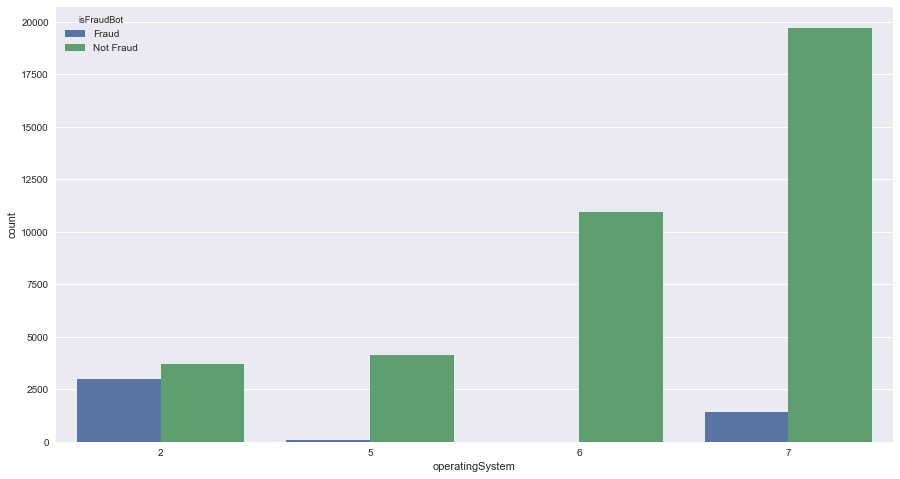

In [179]:
sns.countplot(x='operatingSystem', hue='isFraudBot', data=data)

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


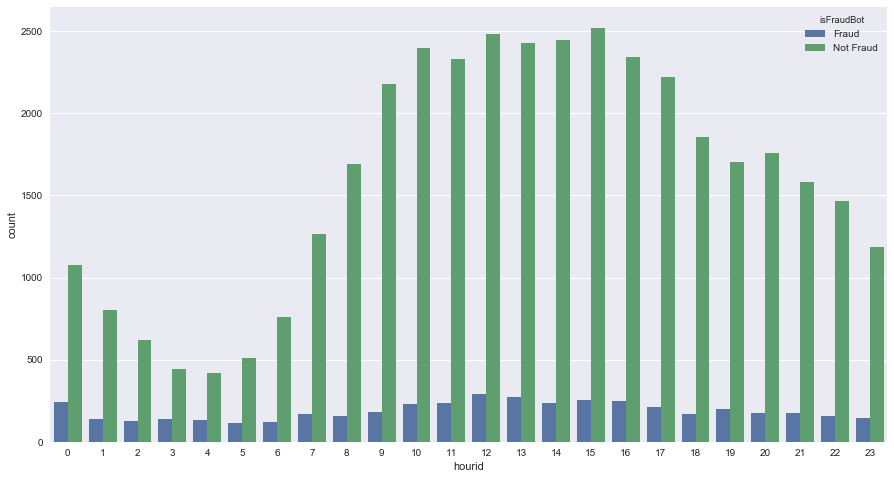

In [185]:
sns.countplot(x='hourid', hue='isFraudBot', data=data)

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


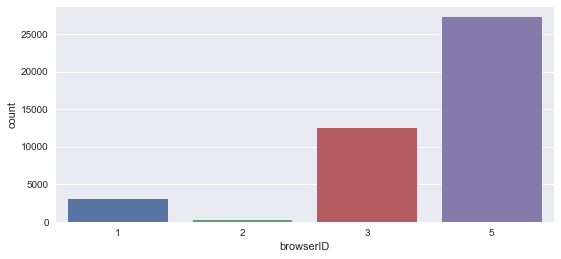

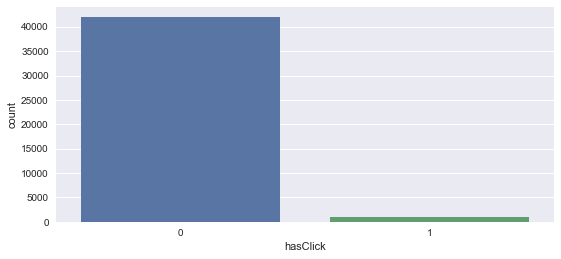

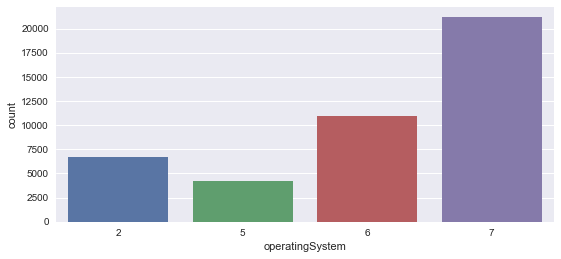

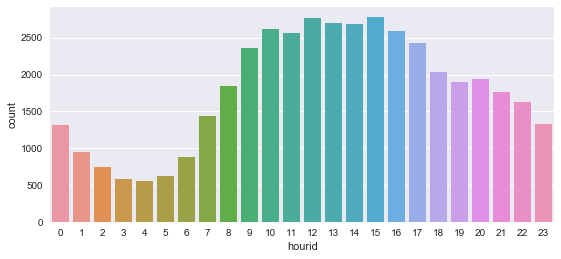

In [249]:
# Bar graphs - for categorical features
cat = ['browserID', 'hasClick', 'operatingSystem', 'hourid']
for col in cat:
    sns.factorplot(data=df, x=col, kind= 'count',size=4,aspect=2)
plt.show()

In [214]:
perc = df.groupby(['browserID', 'isFraudBot']).agg({'isFraudBot': 'count'})
perc.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

isFraudBot
browserID isFraudBot            
1         0             5.186170
          1            94.813830
2         0           100.000000
3         0            86.772445
          1            13.227555
5         0           100.000000

It is clear to see that browsers number 2 and 5 where never used by fraud bots.

In [215]:
perc = df.groupby(['operatingSystem', 'isFraudBot']).agg({'isFraudBot': 'count'})
perc.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

isFraudBot
operatingSystem isFraudBot            
2               0            55.133194
                1            44.866806
5               0            98.247276
                1             1.752724
6               0           100.000000
7               0            93.202966
                1             6.797034

In [217]:
perc = df.groupby(['hourid', 'isFraudBot']).agg({'isFraudBot': 'count'})
perc.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

isFraudBot
hourid isFraudBot            
0      0            81.680545
       1            18.319455
1      0            85.365854
       1            14.634146
2      0            82.930108
       1            17.069892
3      0            76.429809
       1            23.570191
4      0            76.320583
       1            23.679417
5      0            81.935484
       1            18.064516
6      0            86.250000
       1            13.750000
7      0            88.329839
       1            11.670161
8      0            91.598916
       1             8.401084
9      0            92.337003
       1             7.662997
10     0            91.272866
       1             8.727134
11     0            90.795632
       1             9.204368
12     0            89.502165
       1            10.497835
13     0            89.833641
       1            10.166359
14     0            91.210428
       1             8.789572
15     0            90.752069
       1             9.247931
16     0            90.386100
       1             9.613900
17     0            91.358025
       1             8.641975
18     0            91.576355
       1             8.423645
19     0            89.584429
       1            10.415571
20     0            90.909091
       1             9.090909
21     0            90.056818
       1             9.943182
22     0            90.326556
       1             9.673444
23     0            89.315275
       1            10.684725

In [329]:
perc = pd.DataFrame(df.groupby(['userID', 'isFraudBot']).agg({'isFraudBot': 'count'}))

In [387]:
perc2 = perc.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [390]:
type(perc2)

pandas.core.frame.DataFrame

In [395]:
perc3 = perc2.add_suffix('_Count').reset_index()

In [421]:
perc3[(perc3['isFraudBot']==1)&(perc3['isFraudBot_Count']==100)]

,userID,isFraudBot,isFraudBot_Count
9,10708787465435603,1,100.0
12,12784403791926714,1,100.0
55,51656561106747483,1,100.0
76,64487850009182799,1,100.0
96,89648939591802366,1,100.0
100,93722505552367380,1,100.0
104,96355528891523238,1,100.0
163,154589476279441634,1,100.0
195,191530703265973453,1,100.0
203,206904954090724337,1,100.0


The list above presents all the fraud bot users in the DB

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


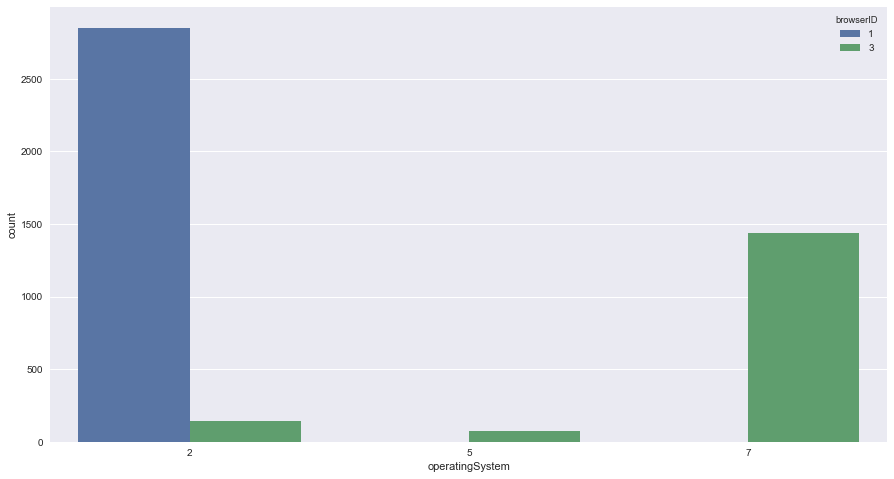

In [109]:
sns.countplot(x='operatingSystem', hue='browserID', data=frauds)

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


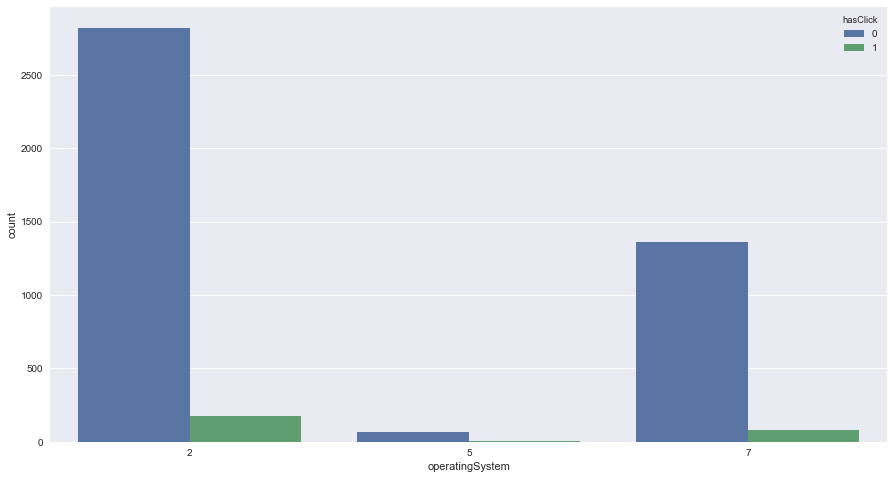

In [115]:
sns.countplot(x='operatingSystem', hue='hasClick' , data=frauds)

## Dimension Reduction

Feature selection, the process of finding and selecting the most useful features in a dataset, is a crucial step of the machine learning pipeline. Unnecessary features decrease training speed, decrease model interpretability, and, most importantly, decrease generalization performance on the test set.

Some of the most common feature selection methods:

<ul>
    <li>Collinear (highly correlated) features</li>
    <li>Features with zero importance in a tree-based model</li>
    <li>Features with low importance</li>
    <li>Features with a single unique value</li>
    <li>Missing Value Ratio (need to check the reason before removal)</li>
    <li>Forward Feature Selection</li>
    <li>Factor Analysis</li>
    <li>Principal Component Analysis</li>    
</ul>

#### Features with a single unique value

Following the EDA, we found that "dayid" feature has just one variable

In [425]:
# Delete Unecessary features
del df['dayid']

#### Multicollinearity

In [439]:
df.corr()

,Numofimpressions,NumofVideoImpressions,NumOfViewableImpressions,hasClick,isFraudBot
Numofimpressions,1.000000,0.169316,0.516405,0.005347,0.055020
NumofVideoImpressions,0.169316,1.000000,0.063582,0.003941,0.025228
NumOfViewableImpressions,0.516405,0.063582,1.000000,0.024893,0.109382
hasClick,0.005347,0.003941,0.024893,1.000000,0.075619
isFraudBot,0.055020,0.025228,0.109382,0.075619,1.000000


In [441]:
corr = df.corr().abs()
co = corr.unstack()

In [444]:
sort_cor = co.sort_values(kind="quicksort")
sort_cor[sort_cor > 0.8]

Numofimpressions          Numofimpressions            1.0
NumOfViewableImpressions  NumOfViewableImpressions    1.0
NumofVideoImpressions     NumofVideoImpressions       1.0
hasClick                  hasClick                    1.0
isFraudBot                isFraudBot                  1.0
dtype: float64

In [445]:
for col in ['hasClick','isFraudBot']:
    df[col] = df[col].astype('int64')

#### Chi Square Test

In [448]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.01):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['browserID','operatingSystem','hasClick','userID','domainHash','hourid']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="isFraudBot" )

browserID is IMPORTANT for Prediction
operatingSystem is IMPORTANT for Prediction
hasClick is IMPORTANT for Prediction
userID is IMPORTANT for Prediction
domainHash is IMPORTANT for Prediction
hourid is IMPORTANT for Prediction


#### Feature Importance

In [452]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
X = df.drop(['isFraudBot'], axis = 1)  # independent columns
Y = df[['isFraudBot']]  # target column
model = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
model.fit(X, Y)

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [453]:
print(model.feature_importances_)

[ 0.          0.04699813  0.19232397  0.10437654  0.02057045  0.0052025
  0.02292864  0.00265471  0.12417568  0.48076938]


In [454]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
browserID,0.480769
domainHash,0.192324
operatingSystem,0.124176
userID,0.104377
hourid,0.046998
NumOfViewableImpressions,0.022929
Numofimpressions,0.020570
NumofVideoImpressions,0.005203
hasClick,0.002655
dayid,0.000000


In [460]:
categories = ['hourid', 'domainHash', 'userID', 'hasClick','isFraudBot','operatingSystem','browserID']
# Change to categorial data type
for col in categories:
    df[col] = df[col].astype('category')

In [512]:
df=df.drop(['hasClick', 'Numofimpressions','NumofVideoImpressions','NumOfViewableImpressions'], axis=1)

## Model Implementation

In [518]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
#Install lifetimes package
#import sys
#!{sys.executable} -m pip install lightgbm
X_train, X_test, y_train, y_test = train_test_split(df.drop('isFraudBot', axis=1), df['isFraudBot'], test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34400, 5)
(8600, 5)
(34400,)
(8600,)


In [519]:
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

In [520]:
#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 90,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

In [521]:
# View the default model params:
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'scale_pos_weight'])

In [522]:
# Create the grid
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

#### Hyper-Parameter Tuning

In [523]:
# Run the grid
grid.fit(X_train, y_train,)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   47.3s finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.07, 'n_estimators': 8, 'num_leaves': 20, 'objective': 'binary', 'random_state': 501, 'subsample': 0.7}
0.969825581395


In [540]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['objective'] = grid.best_params_['objective']
params['random_state'] = grid.best_params_['random_state']
params['subsample'] = grid.best_params_['subsample']

In [541]:
%%time
lgbm = lgb.train(params, lgb_train, num_boost_round=300)

Wall time: 109 ms


C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [542]:
y_prob = lgbm.predict(X_test)

In [544]:
y_pred = np.where(y_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

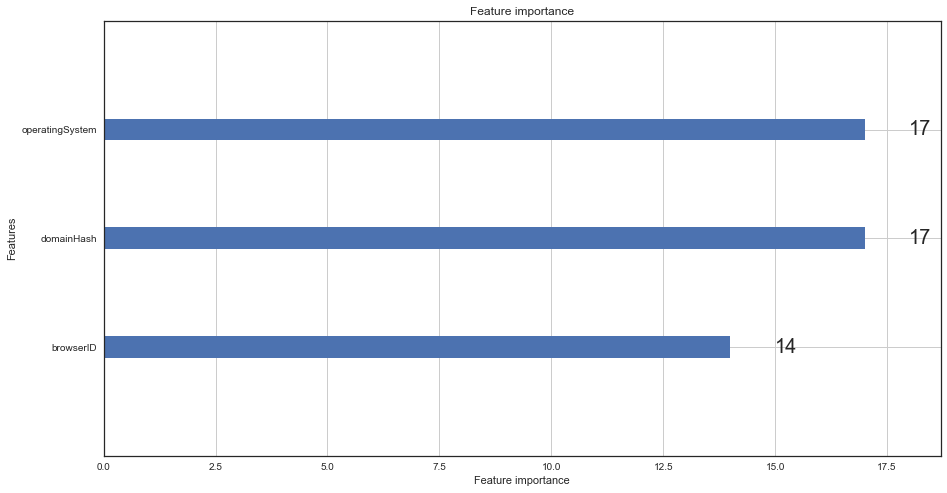

In [545]:
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=3, importance_type='split')
plt.show()

<Figure size 1080x576 with 0 Axes>

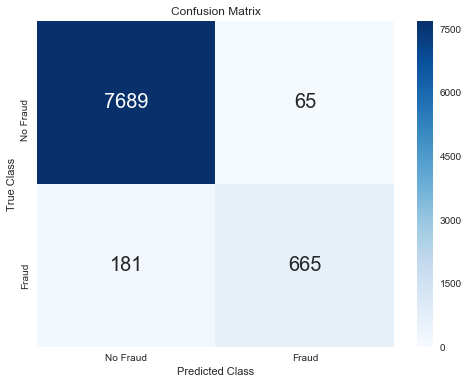

In [551]:
#Print Confusion Matrix
from sklearn import metrics

plt.figure()
cm = metrics.confusion_matrix(y_test, y_pred)
labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [547]:
y_prob = pd.DataFrame(y_prob)

In [552]:
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

In [553]:
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_prob)
print('AUC: %.3f' % auc)

AUC: 0.986


In [554]:
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
f1

0.84390862944162437